
<br>
<font>
<div dir=ltr align=center>
<img src="https://cdn.freebiesupply.com/logos/large/2x/sharif-logo-png-transparent.png" width=150 height=150> <br>
<font color=0F5298 size=7>
Artificial Intelligence <br>
<font color=2565AE size=5>
Computer Engineering Department <br>
Spring 2024<br>
<font color=3C99D size=5>
Practical Assignment 4 - polynomial regression <br>
<font color=696880 size=4>
Ali Rahimi Akbar

____

#Personal Data

In [87]:
# Set your student number and name
student_number = '401106096'
Name = 'Radin'
Last_Name = 'Shahdaei'

## Introduction
This exercise explores polynomial regression, a form of regression analysis where the relationship between the independent variable \( X \) and the dependent variable \( y \) is modeled as an \( n \)th degree polynomial. We will create a synthetic dataset, train models with varying degrees of polynomials, and evaluate their performance on different test sets.


## 1. Create a synthetic dataset (20 Points)
First, define a function to generate a dataset with 1000 samples in the range of **-3 to -1** from a polynomial with added noise. Assume that the noise is from a normal distribution and has a mean of 0 and std of 5.

The relationship between the independent variable \( X \) and the dependent variable \( y \) is given by the following equation:

\[ y = 0.1X^6 - 2X^3 + 7X^2 - 9X + 3 \]

Generate the independent variable \( X \) using the `numpy` library and then calculate the dependent variable \( y \) using the given equation.

In [1]:
import numpy as np

def generate_dataset(range_start, range_end, num_samples, noise_std=5.0):
    X = np.random.uniform(range_start, range_end, num_samples)
    y = 0.1 * X**6 - 2 * X**3 + 7 * X**2 - 9 * X + 3 + np.random.normal(0, noise_std, size=num_samples)
    return X, y

X, y = generate_dataset(-3, -1, 1000)

print("X values:", X[:5])
print("y values:", y[:5])


X values: [-2.6134627  -2.59380064 -1.01531673 -1.10612358 -1.36595848]
y values: [138.13073751 138.11182754  22.37567276  27.43319325  36.83138657]


## 2. Splitting the Dataset (5 Points)
Split the dataset into training and two test sets with the same length, ensuring one test set is in the range of the training data and the other is in the **range of 4 to 6.**

In [2]:
from sklearn.model_selection import train_test_split

X_train, X_test1, y_train, y_test1 = train_test_split(X, y, test_size=0.5, random_state=42)
X_test2, y_test2 = generate_dataset(4, 6, 500)

# create the second test set by generating a seperate dataset

KeyboardInterrupt: 

## 3. Polynomial Regression Training (30 Points)
Train polynomial regression models of varying degrees from degree = 2 to degree = 12. You can't use sklearn library for this section

In [100]:
degrees = np.arange(2, 13)

class PolynomialRegression() :
    def __init__(self, degree, learning_rate = 0.001, iterations =100000) :
        self.degree = degree
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.theta = None


    def fit(self, X, y) :
        n = len(X)

        X_vandermond = np.vander(X, self.degree + 1, increasing = True)
        self.theta = np.zeros(self.degree + 1)

        for _ in range (self.iterations):
            error = X_vandermond.dot(self.theta) - y
            grad = X_vandermond.T.dot(error) / n

            self.theta -= self.learning_rate * np.tanh(grad)
            # use tanh function to stop exploding gradient

    def predict(self, X) :
        X_vandermond = np.vander(X, self.degree + 1, increasing = True)
        return X_vandermond.dot(self.theta)

models = {}
for i in degrees:
    model = PolynomialRegression(i)
    model.fit(X_train, y_train)
    models[i] = model

## 4. Model Evaluation (15 Points)
Evaluate the models on both train and test sets using MSE. You can use the `mean_squared_error` from `sklearn.metrics`.

In [101]:
from sklearn.metrics import mean_squared_error

def evaluate_models(models):

    results = {}
    for i in degrees:
        model = models[i]
        train_mse = evaluate_model(model, X_train, y_train)
        test1_mse = evaluate_model(model, X_test1, y_test1)
        test2_mse = evaluate_model(model, X_test2, y_test2)

        results[i] = (train_mse, test1_mse, test2_mse)

    return results



def evaluate_model(model, X_test, y_test):
    y_test_pred = model.predict(X_test)
    test_mse = mean_squared_error(y_test, y_test_pred)
    return test_mse


results = evaluate_models(models)

for i in degrees:
    train_mse, test1_mse, test2_mse = results[i]
    print(f"Degree {i}: Train MSE = {train_mse}, Test1 MSE = {test1_mse}, Test2 MSE = {test2_mse}")

Degree 2: Train MSE = 71.08291273692754, Test1 MSE = 71.94430806118591, Test2 MSE = 1843558.7358223095
Degree 3: Train MSE = 29.003374905621076, Test1 MSE = 28.887750901296045, Test2 MSE = 13705174.663559575
Degree 4: Train MSE = 26.872010993921418, Test1 MSE = 27.08412779121236, Test2 MSE = 192918.73120916646
Degree 5: Train MSE = 26.89649853532988, Test1 MSE = 27.14620250880805, Test2 MSE = 331699.302582706
Degree 6: Train MSE = 30.882181323462895, Test1 MSE = 30.352605663841608, Test2 MSE = 220387065.4104295
Degree 7: Train MSE = 48.64847820986662, Test1 MSE = 45.619380781675645, Test2 MSE = 1395495056.8115942
Degree 8: Train MSE = 91.98499288398577, Test1 MSE = 87.60611022506329, Test2 MSE = 5421011865.311519
Degree 9: Train MSE = 132.83124941166412, Test1 MSE = 125.58107648667821, Test2 MSE = 9349885266.800375
Degree 10: Train MSE = 758.599138587141, Test1 MSE = 667.9493153235039, Test2 MSE = 916902080.0843376
Degree 11: Train MSE = 6294.080060847528, Test1 MSE = 5533.135563493646

## 5. Plotting your predicted polynomial function

plot your predicted function at degree 5 and 6 and 7 and the base function from question in range -3 to -1.

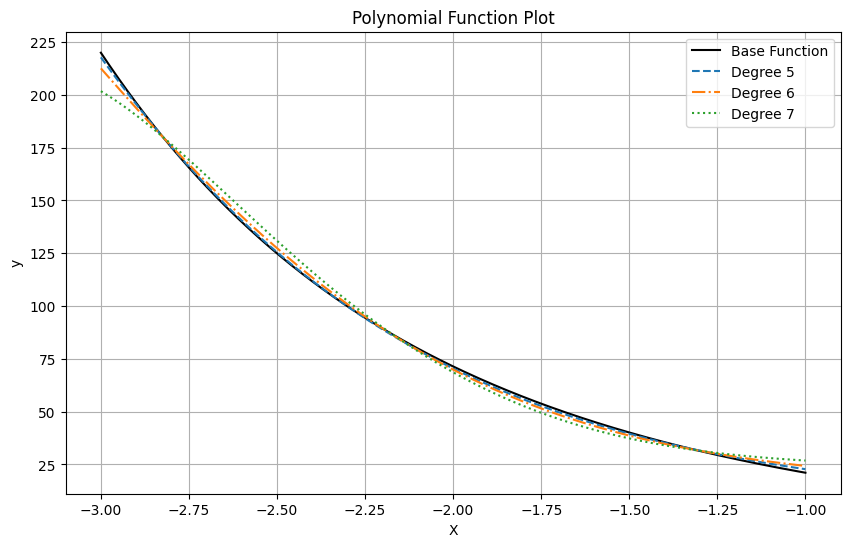

In [102]:
import numpy as np
import matplotlib.pyplot as plt

def base_function(X):
    return 0.1 * X**6 - 2 * X**3 + 7 * X**2 - 9 * X + 3

x_values = np.linspace(-3, -1, 400)

y_base = base_function(x_values)

y_pred5 = models[5].predict(x_values)
y_pred6 = models[6].predict(x_values)
y_pred7 = models[7].predict(x_values)

plt.figure(figsize=(10, 6))
plt.plot(x_values, y_base, label='Base Function', color='black')
plt.plot(x_values, y_pred5, label='Degree 5', linestyle='--')
plt.plot(x_values, y_pred6, label='Degree 6', linestyle='-.')
plt.plot(x_values, y_pred7, label='Degree 7', linestyle=':')

plt.xlabel('X')
plt.ylabel('y')
plt.title('Polynomial Function Plot')
plt.legend()
plt.grid(True)
plt.show()


## 6. Plotting Model Scores (20 Points)

Now to evaluate the performance of the polynomial regression models, plot the **logarithm** of losses of the training and test sets based on the model degree varying from 2 to 12.

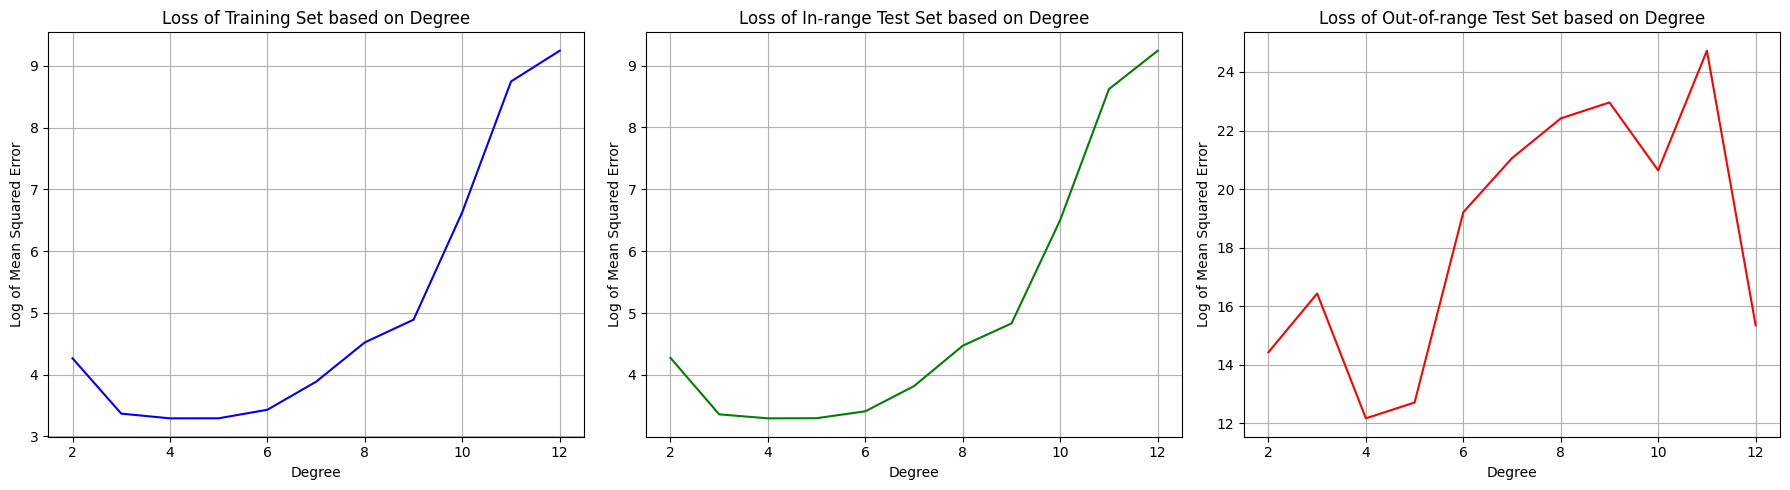

In [103]:
import numpy as np
import matplotlib.pyplot as plt

train_mses = []
test1_mses = []
test2_mses = []

for i in degrees:
    train_mses.append(results[i][0])
    test1_mses.append(results[i][1])
    test2_mses.append(results[i][2])

log_training_mse = np.log(train_mses)
log_in_range_test_mse = np.log(test1_mses)
log_out_of_range_test_mse = np.log(test2_mses)

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 5))

axes[0].plot(degrees, log_training_mse, label='Training Set', color='blue')
axes[0].set_title('Loss of Training Set based on Degree')
axes[0].set_xlabel('Degree')
axes[0].set_ylabel('Log of Mean Squared Error')
axes[0].grid(True)

axes[1].plot(degrees, log_in_range_test_mse, label='In-range Test Set', color='green')
axes[1].set_title('Loss of In-range Test Set based on Degree')
axes[1].set_xlabel('Degree')
axes[1].set_ylabel('Log of Mean Squared Error')
axes[1].grid(True)

axes[2].plot(degrees, log_out_of_range_test_mse, label='Out-of-range Test Set', color='red')
axes[2].set_title('Loss of Out-of-range Test Set based on Degree')
axes[2].set_xlabel('Degree')
axes[2].set_ylabel('Log of Mean Squared Error')
axes[2].grid(True)

fig.tight_layout()
plt.show()

## Conclusion (10 Points)
With comparing the loss of **training set and the test set** specially in higher degrees, what we can conclude about the bias - variance trade off?

Conclusion on Bias-Variance Tradeoff:

Low-Degree Polynomials (2 to around 6):

These models show lower complexity, which can lead to higher bias but lower variance. They do not fit the training data as closely but generalize better to new, unseen data, especially within the range of training data.

Mid-Degree Polynomials (around 7 to 10):

These models begin to fit the training data better, reducing bias to a minimum at the cost of an increase in variance, as shown by the uptick in loss on the in-range test set. They balance between underfitting and overfitting, reaching an optimal point of complexity where the loss on the test data within the training range is minimized.

High-Degree Polynomials (above 10):

High-degree polynomials tend to overfit the training data, showing significantly increased variance. The training set loss continues to drop due to the model's ability to capture more data specifics (noise included), which do not generalize. This is reflected in the sharp increase in the loss on both in-range and out-of-range test sets. The model loses its ability to generalize, indicating a high variance scenario.